# **📄 Proyecto inteligencia artificial - Analisis Deserción Escolar**

<img src="https://raw.githubusercontent.com/Andres-Martinez-2706/varios/refs/heads/main/a.png" width="800px" height="300px" >


**Por:** Andres Felipe Martinez Ortiz - 2225112

## **📥importacion de librerias nescesarias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

## ℹ️ **About file (temporal)**


About this file

Structure:
Number of Rows: 700

Number of Columns: 36

Column Descriptions:

* School: Name of the school attended (e.g., MS).

* Gender: Gender of the student (e.g., M for Male, F for Female).

* Age: Age of the student.

* Address: Type of residence (U for urban, R for rural).

* Family_Size: Size of the family (GT3 for greater than 3, LE3 for less than or equal to 3).

* Parental_Status: Living arrangement of parents (A for living together, T for living apart).

* Mother_Education: Education level of the mother (0 to 4).

* Father_Education: Education level of the father (0 to 4).

* Mother_Job: Type of job held by the mother.

* Father_Job: Type of job held by the father.

* Reason_for_Choosing_School: Reason for selecting the school (e.g., course).

* Guardian: Guardian of the student (e.g., mother).

* Travel_Time: Time taken to travel to school.

* Study_Time: Weekly study hours (1 to 4).

* Number_of_Failures: Number of past class failures.

* School_Support: Whether the student receives extra educational support (yes/no).

* Family_Support: Family provided educational support (yes/no).

* Extra_Paid_Class: Participation in extra paid classes (yes/no).

* Extra_Curricular_Activities: Involvement in extracurricular activities (yes/no).

* Attended_Nursery: Attendance in nursery school (yes/no).

* Wants_Higher_Education: Desire to pursue higher education (yes/no).

* Internet_Access: Availability of internet at home (yes/no).

* In_Relationship: Romantic relationship status (yes/no).

* Family_Relationship: Quality of family relationships (scale 1 to 5).

* Free_Time: Amount of free time after school (scale 1 to 5).

* Going_Out: Frequency of going out with friends (scale 1 to 5).

* Weekend_Alcohol_Consumption: Alcohol consumption on weekends (scale 1 to 5).

* Weekday_Alcohol_Consumption: Alcohol consumption on weekdays (scale 1 to 5).

* Health_Status: Health rating of the student (scale 1 to 5).

* Number_of_Absences: Total number of absences from school.

* Grade_1: Grade received in the first assessment.

* Grade_2: Grade received in the second assessment.

* Final_Grade: Final grade received (G3).

* Dropped_Out: Indicator of whether the student has dropped out (True/False).

### Travel_Time (1–4)

1 → < 15 min

2 → 15–30 min

3 → 30–60 min

4 → > 1 hora

### Study_Time (1–4)

1 → < 2 horas/semana

2 → 2–5 horas/semana

3 → 5–10 horas/semana

4 → > 10 horas/semana

### Mother_Education / Father_Education (0–4)

0 → Sin estudios

1 → Educación primaria

2 → Educación secundaria

3 → Educación superior (universidad, técnico, licenciatura)

4 → Posgrado (maestría/doctorado)

## 📂 **Importar archivos**

In [3]:
link = "https://raw.githubusercontent.com/Andres-Martinez-2706/varios/refs/heads/main/student%20dropout.csv"
csv = pd.read_csv(link)

print(csv.shape)
print(csv.columns)
pd.options.display.max_columns = None
csv.head()

(649, 34)
Index(['School', 'Gender', 'Age', 'Address', 'Family_Size', 'Parental_Status',
       'Mother_Education', 'Father_Education', 'Mother_Job', 'Father_Job',
       'Reason_for_Choosing_School', 'Guardian', 'Travel_Time', 'Study_Time',
       'Number_of_Failures', 'School_Support', 'Family_Support',
       'Extra_Paid_Class', 'Extra_Curricular_Activities', 'Attended_Nursery',
       'Wants_Higher_Education', 'Internet_Access', 'In_Relationship',
       'Family_Relationship', 'Free_Time', 'Going_Out',
       'Weekend_Alcohol_Consumption', 'Weekday_Alcohol_Consumption',
       'Health_Status', 'Number_of_Absences', 'Grade_1', 'Grade_2',
       'Final_Grade', 'Dropped_Out'],
      dtype='object')


,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,Reason_for_Choosing_School,Guardian,Travel_Time,Study_Time,Number_of_Failures,School_Support,Family_Support,Extra_Paid_Class,Extra_Curricular_Activities,Attended_Nursery,Wants_Higher_Education,Internet_Access,In_Relationship,Family_Relationship,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11,False
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11,False
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12,False
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14,False
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13,False


In [4]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   School                       649 non-null    object
 1   Gender                       649 non-null    object
 2   Age                          649 non-null    int64 
 3   Address                      649 non-null    object
 4   Family_Size                  649 non-null    object
 5   Parental_Status              649 non-null    object
 6   Mother_Education             649 non-null    int64 
 7   Father_Education             649 non-null    int64 
 8   Mother_Job                   649 non-null    object
 9   Father_Job                   649 non-null    object
 10  Reason_for_Choosing_School   649 non-null    object
 11  Guardian                     649 non-null    object
 12  Travel_Time                  649 non-null    int64 
 13  Study_Time                   649 no

In [5]:
csv.describe()

,Age,Mother_Education,Father_Education,Travel_Time,Study_Time,Number_of_Failures,Family_Relationship,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


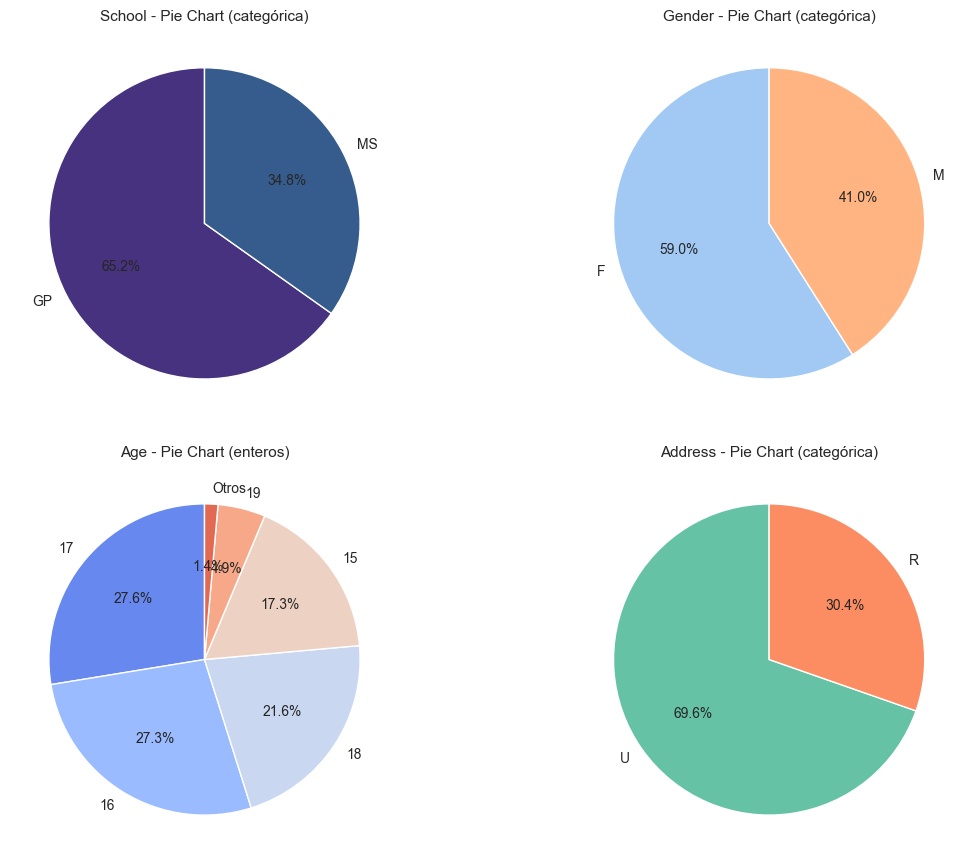

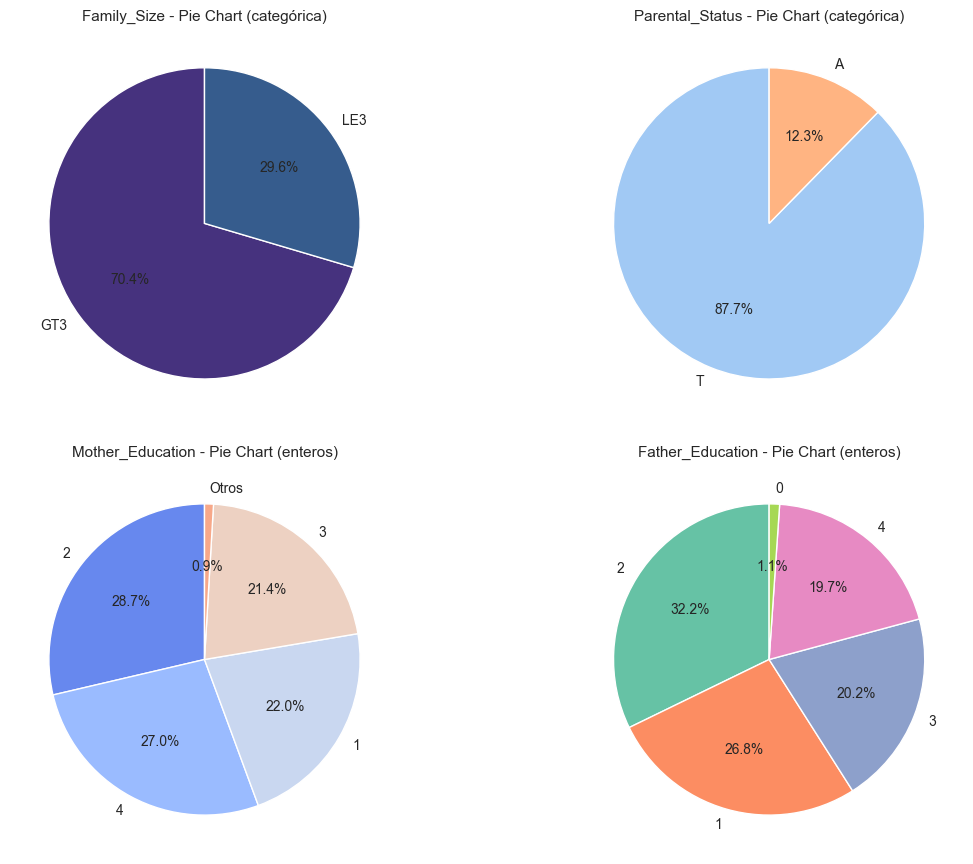

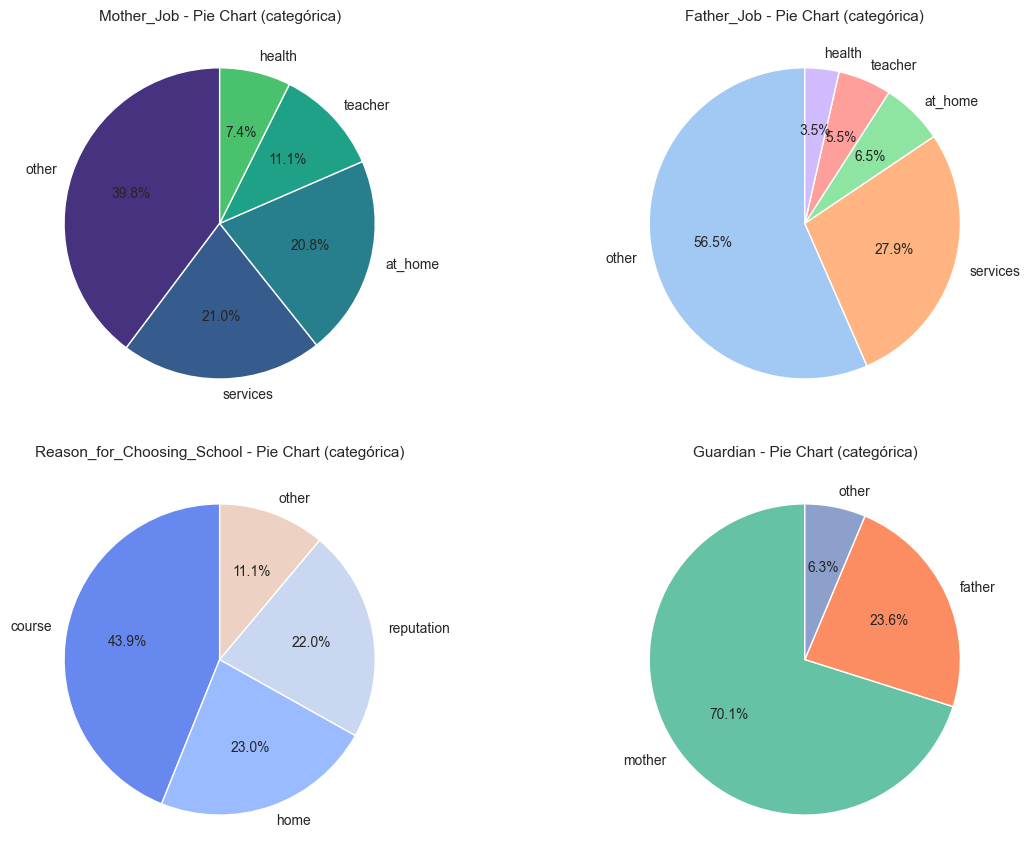

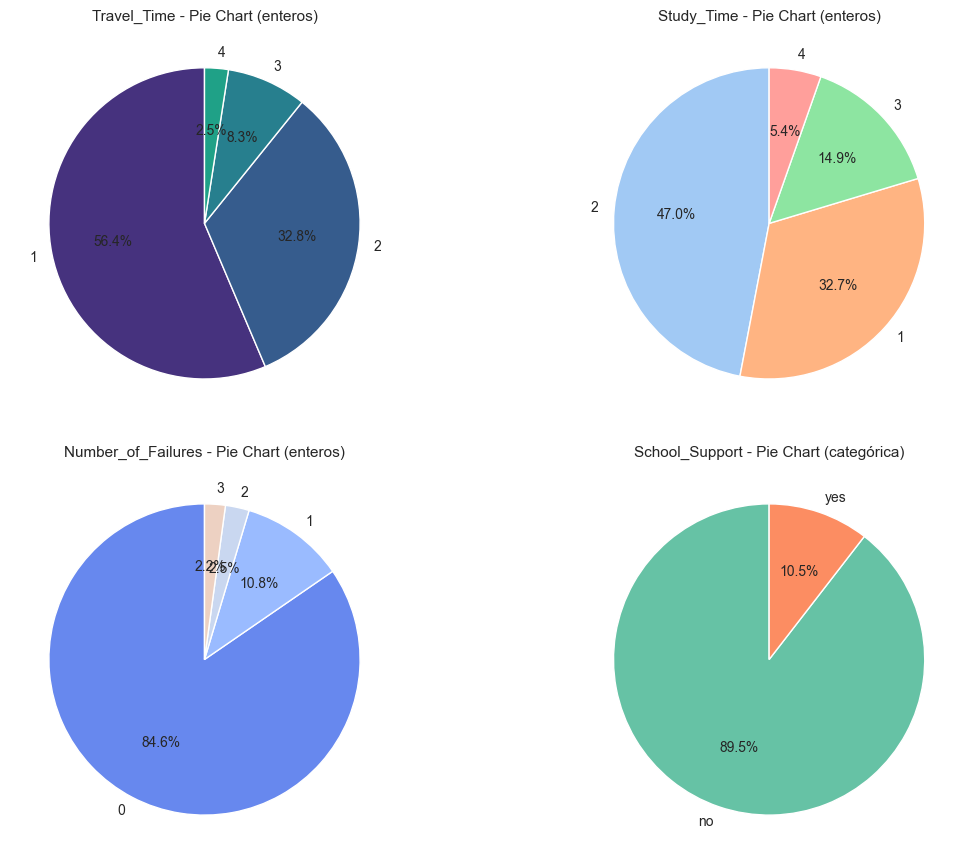

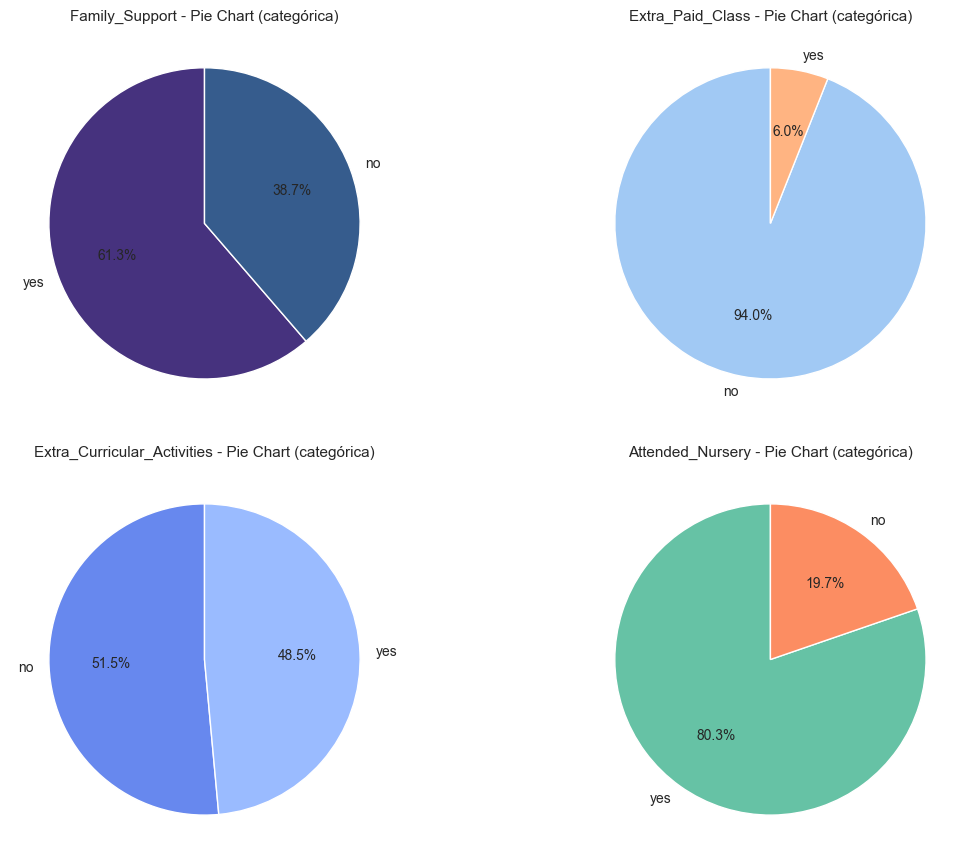

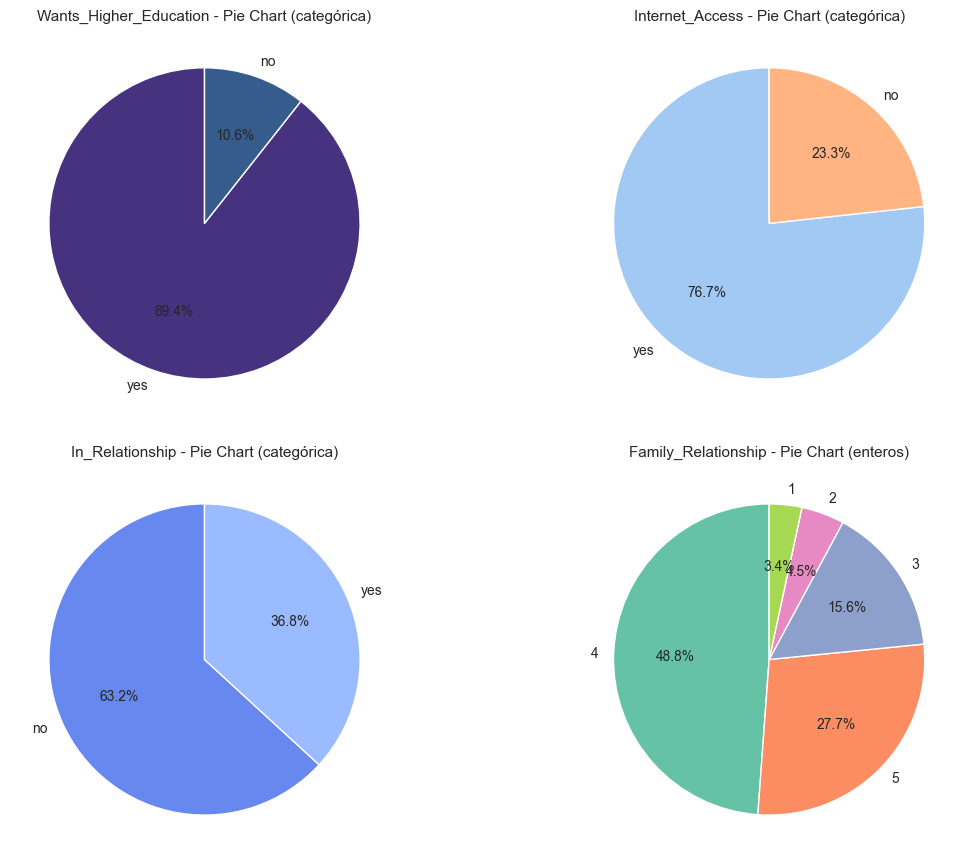

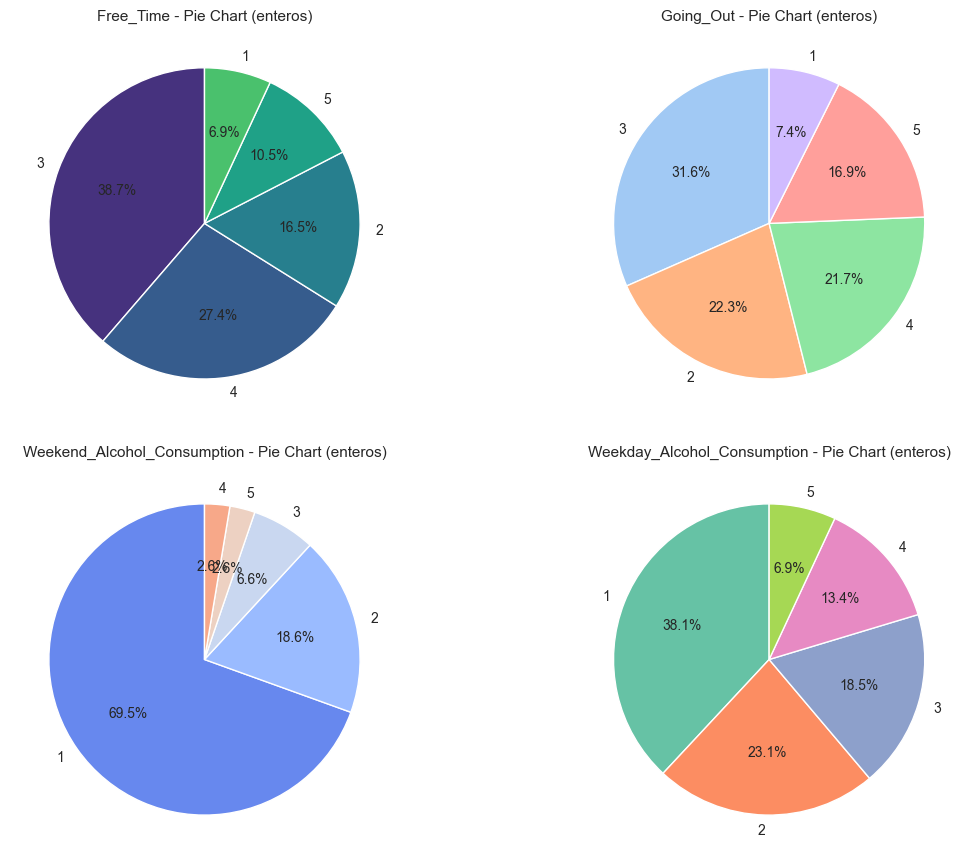

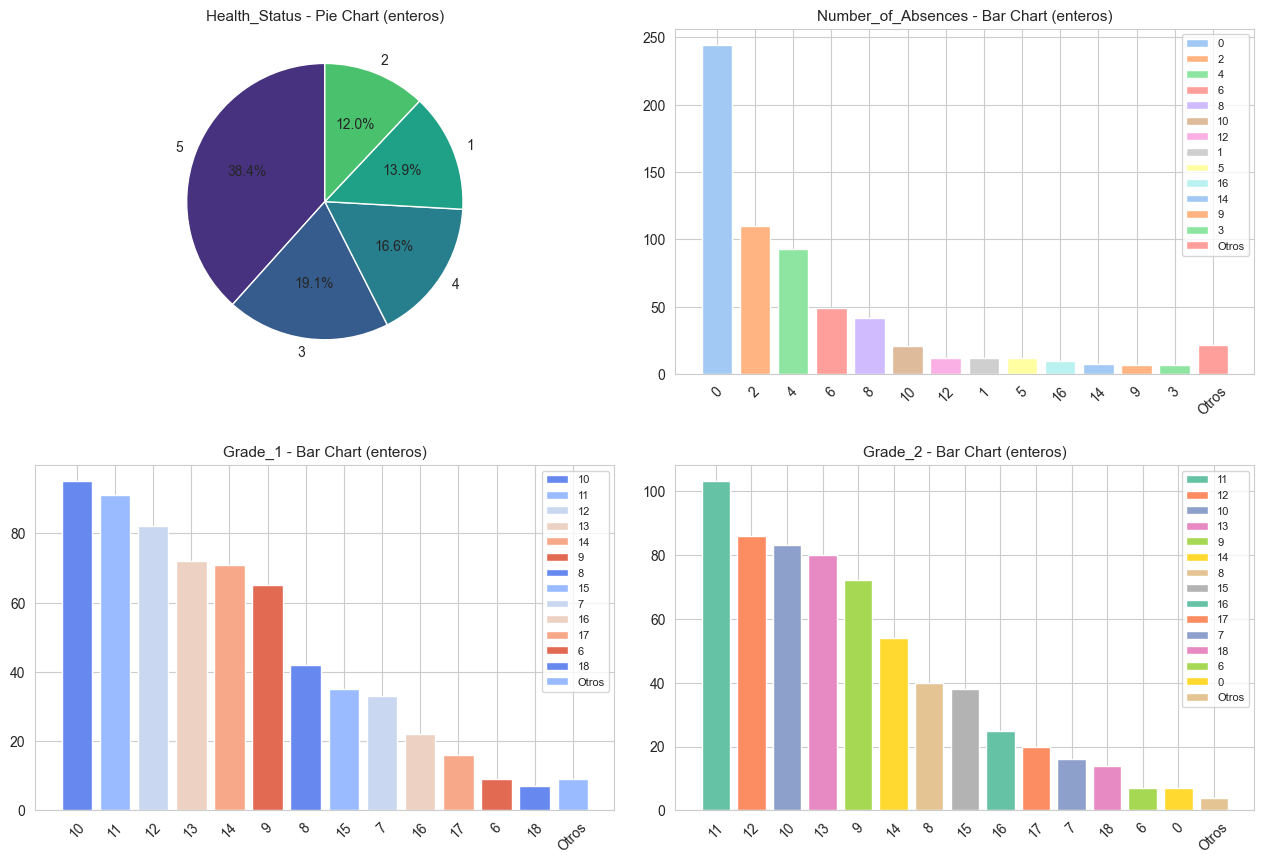

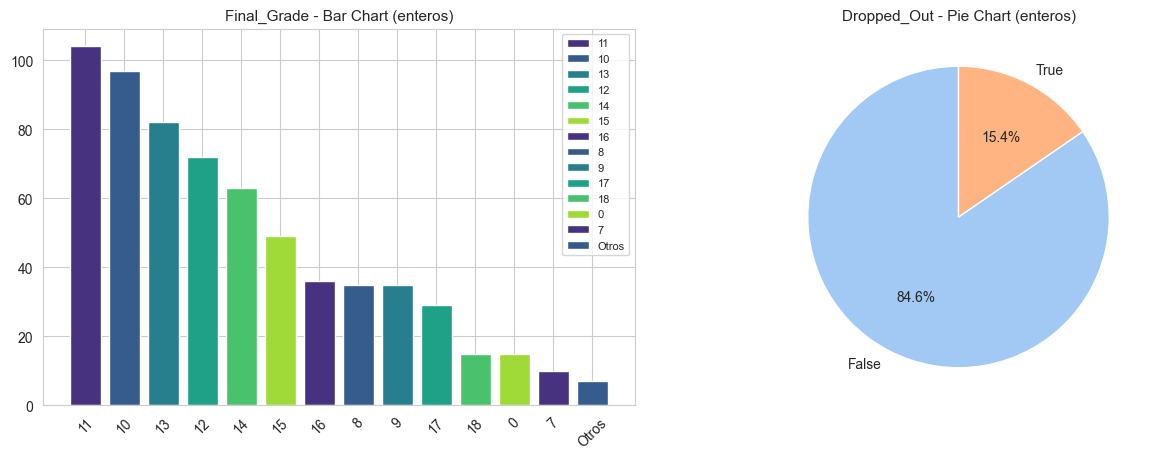

In [6]:
sns.set_style("whitegrid")  # estilo más limpio

# Función auxiliar para agrupar valores <1% en "Otros"
def agrupar_otros(counts, threshold=0.01):
    total = counts.sum()
    porcentajes = counts / total
    mayores = counts[porcentajes >= threshold]
    otros = counts[porcentajes < threshold]
    if not otros.empty:
        mayores["Otros"] = otros.sum()
    return mayores

# Número de columnas por figura
plots_per_fig = 4
num_cols = len(csv.columns)
rows, cols = 2, 2

# Paletas de colores modernas
paletas = [
    sns.color_palette("viridis"),
    sns.color_palette("pastel"),
    sns.color_palette("coolwarm"),
    sns.color_palette("Set2"),
]

for i in range(0, num_cols, plots_per_fig):
    fig, axes = plt.subplots(rows, cols, figsize=(13, 9), subplot_kw=dict(projection=None))
    axes = axes.flatten()

    for j, col in enumerate(csv.columns[i:i+plots_per_fig]):
        ax = axes[j]
        data = csv[col].dropna()
        palette = paletas[j % len(paletas)]

        # CASO 1: numérica
        if pd.api.types.is_numeric_dtype(data):
            if any(data % 1 != 0):  # valores decimales → gráfico 3D de línea
                ax = fig.add_subplot(rows, cols, j+1, projection='3d')
                x = np.arange(len(data))
                y = np.zeros_like(x)
                z = data.values
                ax.plot(x, y, z, color=sns.color_palette("coolwarm", 10)[3], lw=2)
                ax.set_title(f"{col} - Linea 3D (decimales)", fontsize=11)
                ax.set_xlabel("Índice")
                ax.set_zlabel("Valor")
            else:
                counts = agrupar_otros(data.value_counts())
                if len(counts) > 8:  # demasiadas categorías → usar barras con leyenda
                    bars = ax.bar(counts.index.astype(str), counts.values, color=palette)
                    ax.legend(bars, counts.index, fontsize=8, loc="upper right")
                    ax.set_title(f"{col} - Bar Chart (enteros)", fontsize=11)
                    ax.tick_params(axis='x', rotation=45)
                else:  # pocos → gráfico de pastel
                    ax.pie(counts, labels=counts.index, autopct="%1.1f%%", colors=palette, startangle=90)
                    ax.set_title(f"{col} - Pie Chart (enteros)", fontsize=11)

        # CASO 2: categórica
        else:
            counts = agrupar_otros(data.value_counts())
            if len(counts) > 8:  # demasiadas categorías
                bars = ax.bar(counts.index.astype(str), counts.values, color=palette)
                ax.legend(bars, counts.index, fontsize=8, loc="upper right")
                ax.set_title(f"{col} - Bar Chart (categórica)", fontsize=11)
                ax.tick_params(axis='x', rotation=45)
            else:
                ax.pie(counts, labels=counts.index, autopct="%1.1f%%", colors=palette, startangle=90)
                ax.set_title(f"{col} - Pie Chart (categórica)", fontsize=11)

    # eliminar subplots vacíos
    for k in range(len(csv.columns[i:i+plots_per_fig]), plots_per_fig):
        fig.delaxes(axes[k])

    plt.tight_layout(pad=2)
    plt.show()

## ⚙️ **Arreglo de datos**

### ☝️ **Revisar valores unicos para codificarlos**

In [7]:
for column in csv.columns:
  uniques = csv[column].unique()
  print(f"Valores únicos en la columna '{column}': {uniques}")

Valores únicos en la columna 'School': ['GP' 'MS']
Valores únicos en la columna 'Gender': ['F' 'M']
Valores únicos en la columna 'Age': [18 17 15 16 19 22 20 21]
Valores únicos en la columna 'Address': ['U' 'R']
Valores únicos en la columna 'Family_Size': ['GT3' 'LE3']
Valores únicos en la columna 'Parental_Status': ['A' 'T']
Valores únicos en la columna 'Mother_Education': [4 1 3 2 0]
Valores únicos en la columna 'Father_Education': [4 1 2 3 0]
Valores únicos en la columna 'Mother_Job': ['at_home' 'health' 'other' 'services' 'teacher']
Valores únicos en la columna 'Father_Job': ['teacher' 'other' 'services' 'health' 'at_home']
Valores únicos en la columna 'Reason_for_Choosing_School': ['course' 'other' 'home' 'reputation']
Valores únicos en la columna 'Guardian': ['mother' 'father' 'other']
Valores únicos en la columna 'Travel_Time': [2 1 3 4]
Valores únicos en la columna 'Study_Time': [2 3 1 4]
Valores únicos en la columna 'Number_of_Failures': [0 3 1 2]
Valores únicos en la columna 

### 🔓**codificar valores a enteros**

In [8]:
# 1. Codificación binaria (sí/no, F/M, etc.)
binary_mappings = {
    "Gender": {"F": 0, "M": 1},
    "Address": {"U": 1, "R": 0},
    "Family_Size": {"GT3": 1, "LE3": 0},
    "Parental_Status": {"A": 1, "T": 0},
    "School_Support": {"yes": 1, "no": 0},
    "Family_Support": {"yes": 1, "no": 0},
    "Extra_Paid_Class": {"yes": 1, "no": 0},
    "Extra_Curricular_Activities": {"yes": 1, "no": 0},
    "Attended_Nursery": {"yes": 1, "no": 0},
    "Wants_Higher_Education": {"yes": 1, "no": 0},
    "Internet_Access": {"yes": 1, "no": 0},
    "In_Relationship": {"yes": 1, "no": 0},
    "Dropped_Out": {False: 0, True: 1}
}

csv.replace(binary_mappings, inplace=True)

# 2. Codificación de variables categóricas con más de 2 valores
multi_categoricals = [
    "School",
    "Mother_Job",
    "Father_Job",
    "Reason_for_Choosing_School",
    "Guardian"
]

label_encoders = {}

for col in multi_categoricals:
    le = LabelEncoder()
    csv[col] = le.fit_transform(csv[col])
    label_encoders[col] = le  # por si quieres decodificar luego

print(csv.dtypes)

csv.head()


School                         int64
Gender                         int64
Age                            int64
Address                        int64
Family_Size                    int64
Parental_Status                int64
Mother_Education               int64
Father_Education               int64
Mother_Job                     int64
Father_Job                     int64
Reason_for_Choosing_School     int64
Guardian                       int64
Travel_Time                    int64
Study_Time                     int64
Number_of_Failures             int64
School_Support                 int64
Family_Support                 int64
Extra_Paid_Class               int64
Extra_Curricular_Activities    int64
Attended_Nursery               int64
Wants_Higher_Education         int64
Internet_Access                int64
In_Relationship                int64
Family_Relationship            int64
Free_Time                      int64
Going_Out                      int64
Weekend_Alcohol_Consumption    int64
W

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3132\3041007575.py:18: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  csv.replace(binary_mappings, inplace=True)


,School,Gender,Age,Address,Family_Size,Parental_Status,Mother_Education,Father_Education,Mother_Job,Father_Job,Reason_for_Choosing_School,Guardian,Travel_Time,Study_Time,Number_of_Failures,School_Support,Family_Support,Extra_Paid_Class,Extra_Curricular_Activities,Attended_Nursery,Wants_Higher_Education,Internet_Access,In_Relationship,Family_Relationship,Free_Time,Going_Out,Weekend_Alcohol_Consumption,Weekday_Alcohol_Consumption,Health_Status,Number_of_Absences,Grade_1,Grade_2,Final_Grade,Dropped_Out
0,0,0,18,1,1,1,4,4,0,4,0,1,2,2,0,1,0,0,0,1,1,0,0,4,3,4,1,1,3,4,0,11,11,0
1,0,0,17,1,1,0,1,1,0,2,0,0,1,2,0,0,1,0,0,0,1,1,0,5,3,3,1,1,3,2,9,11,11,0
2,0,0,15,1,0,0,1,1,0,2,2,1,1,2,0,1,0,0,0,1,1,1,0,4,3,2,2,3,3,6,12,13,12,0
3,0,0,15,1,1,0,4,2,1,3,1,1,1,3,0,0,1,0,1,1,1,1,1,3,2,2,1,1,5,0,14,14,14,0
4,0,0,16,1,1,0,3,3,2,2,1,0,1,2,0,0,1,0,0,1,1,0,0,4,3,2,1,2,5,0,11,13,13,0


### ⬇️**Subsampling para equilibrar Dropped_Out**

In [9]:
false_class = csv[csv["Dropped_Out"] == 0]
true_class = csv[csv["Dropped_Out"] == 1]

# Tomamos una muestra aleatoria del grupo mayoritario igual al tamaño del minoritario
false_sample = false_class.sample(n=len(true_class), random_state=42)

# Unimos ambos para tener un dataset 50/50
df_balanced = pd.concat([false_sample, true_class])

# Mezclamos las filas para no tener sesgos de orden
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(df_balanced["Dropped_Out"].value_counts(normalize=True))

Dropped_Out
0    0.5
1    0.5
Name: proportion, dtype: float64


## ⚡**Entrenamiento de modelos**

### ✂️**Sepracion del dataset**

In [10]:
X = df_balanced.drop(['Dropped_Out', 'Grade_1', 'Grade_2', 'Final_Grade',], axis=1)
y = df_balanced['Dropped_Out']
rnd = 22

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rnd)

### 🌳**Decision tree**

In [11]:
dtc = DecisionTreeClassifier(random_state=rnd)
dtc.fit(X_train, y_train)

acc = accuracy_score(dtc.predict(X_test), y_test)

print(f"Accuracy del modelo: {acc:.4f}")


Accuracy del modelo: 0.6750


### 🌳🌳**Random forest**

In [12]:
rfc = RandomForestClassifier(random_state=rnd)
rfc.fit(X_train, y_train)

acc = accuracy_score(rfc.predict(X_test), y_test)

print(f"Accuracy del modelo: {acc:.4f}")


Accuracy del modelo: 0.7000


### ↗️ **SVC**

In [13]:
svc = SVC(random_state=rnd)
svc.fit(X_train, y_train)

acc = accuracy_score(svc.predict(X_test), y_test)

print(f"Accuracy del modelo: {acc:.4f}")

Accuracy del modelo: 0.7750


## 📈**Learning Curves**

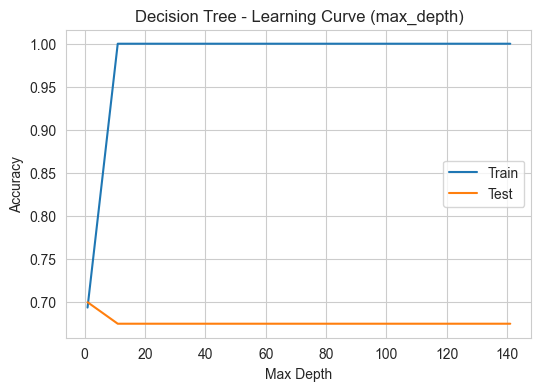

In [14]:
depth_values = range(1, 151, 10)
train_scores, test_scores = [], []

for depth in depth_values:
    model = DecisionTreeClassifier(max_depth=depth, random_state=rnd)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

plt.figure(figsize=(6,4))
plt.plot(depth_values, train_scores, label="Train")
plt.plot(depth_values, test_scores, label="Test")
plt.title("Decision Tree - Learning Curve (max_depth)")
plt.xlabel("Max Depth")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


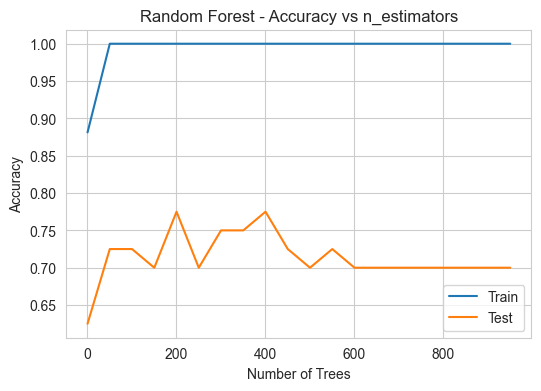

In [15]:
n_estimators_range = range(1, 1001, 50)
train_scores, test_scores = [], []

for n in n_estimators_range:
    model = RandomForestClassifier(n_estimators=n, random_state=rnd)
    model.fit(X_train, y_train)
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))

plt.figure(figsize=(6,4))
plt.plot(n_estimators_range, train_scores, label="Train")
plt.plot(n_estimators_range, test_scores, label="Test")
plt.title("Random Forest - Accuracy vs n_estimators")
plt.xlabel("Number of Trees")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()


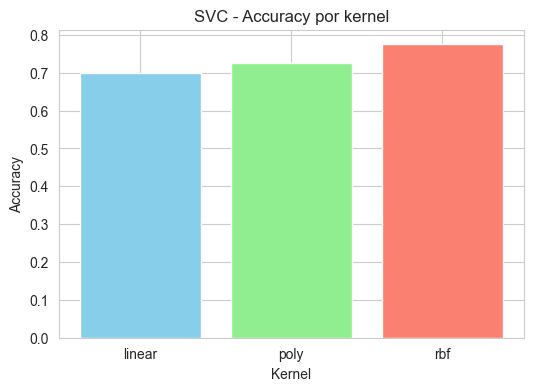

In [16]:
from sklearn.svm import SVC

kernels = ['linear', 'poly', 'rbf']
scores = []

for k in kernels:
    model = SVC(kernel=k)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))

plt.figure(figsize=(6,4))
plt.bar(kernels, scores, color=['skyblue', 'lightgreen', 'salmon'])
plt.title("SVC - Accuracy por kernel")
plt.xlabel("Kernel")
plt.ylabel("Accuracy")
plt.show()


## 🔀**Cross validation**

In [17]:
dt_md = DecisionTreeClassifier(max_depth=5,)

dt_md.fit(X_train, y_train)

cross = cross_val_score(dt_md, X, y, cv=KFold(5, shuffle=True))

acc = accuracy_score(dt_md.predict(X_test), y_test)

print(f"accuracy cross-validation : {acc:.4f}")
print(f"promedio cross-validation : {cross.mean():.4f}")
print(f"desviación estándar cross-validation : +/- {cross.std():.4f}")

accuracy cross-validation : 0.6000
promedio cross-validation : 0.6650
desviación estándar cross-validation : +/- 0.0583


## 🧠 **Modelos DNN**

In [ ]:
# Convertir X a numpy por si acaso
X_train_np = np.array(X_train)
X_test_np = np.array(X_test)

# Normalización simple
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_np)
X_test_scaled = scaler.transform(X_test_np)

# Convertir a tensores 2D (flatten ya lo hacemos en la red)
input_shape = (X_train_scaled.shape[1],)

# Número de clases (ajusta según tu dataset)
num_classes = y_train.nunique()

In [ ]:

# ----------------------------------------------------------
# 🔹 MODELO 1 — 3 capas densas de 120
# ----------------------------------------------------------
model1 = Sequential([
    Flatten(input_shape=input_shape),
    Dense(120, activation='relu'),
    Dense(120, activation='relu'),
    Dense(120, activation='relu'),
    Dense(1, activation='sigmoid')
])

model1.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

history1 = model1.fit(X_train_scaled, y_train, epochs=50, verbose=0)
acc1 = model1.evaluate(X_test_scaled, y_test, verbose=0)[1]

print(f"🔵 Accuracy Modelo 1 (3 capas de 120): {acc1:.4f}")


# ----------------------------------------------------------
# 🔹 MODELO 2 — 3 capas densas de 256
# ----------------------------------------------------------
model2 = Sequential([
    Flatten(input_shape=input_shape),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

model2.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

history2 = model2.fit(X_train_scaled, y_train, epochs=50, verbose=0)
acc2 = model2.evaluate(X_test_scaled, y_test, verbose=0)[1]

print(f"🟢 Accuracy Modelo 2 (3 capas de 256): {acc2:.4f}")


# ----------------------------------------------------------
# 🔹 MODELO 3 — 64 → 128 → 256
# ----------------------------------------------------------
model3 = Sequential([
    Flatten(input_shape=input_shape),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

model3.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])

history3 = model3.fit(X_train_scaled, y_train, epochs=50, verbose=0)
acc3 = model3.evaluate(X_test_scaled, y_test, verbose=0)[1]

print(f"🟣 Accuracy Modelo 3 (64 → 128 → 256): {acc3:.4f}")


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


🔵 Accuracy Modelo 1 (3 capas de 120): 0.6750
🟢 Accuracy Modelo 2 (3 capas de 256): 0.7750
🟣 Accuracy Modelo 3 (64 → 128 → 256): 0.6500


In [ ]:

# ----------------------------------------------------------
# 🔹 MODELO 1 — 3 capas densas de 120
# ----------------------------------------------------------
model1 = Sequential([
    Flatten(input_shape=input_shape),
    Dense(120, activation='relu'),
    Dense(120, activation='relu'),
    Dense(120, activation='relu'),
    Dense(num_classes, activation="relu")
])

model1.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history1 = model1.fit(X_train_scaled, y_train, epochs=50, verbose=0)
acc1 = model1.evaluate(X_test_scaled, y_test, verbose=0)[1]

print(f"🔵 Accuracy Modelo 1 (3 capas de 120): {acc1:.4f}")


# ----------------------------------------------------------
# 🔹 MODELO 2 — 3 capas densas de 256
# ----------------------------------------------------------
model2 = Sequential([
    Flatten(input_shape=input_shape),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(256, activation='relu'),
    Dense(num_classes, activation="relu")
])

model2.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history2 = model2.fit(X_train_scaled, y_train, epochs=50, verbose=0)
acc2 = model2.evaluate(X_test_scaled, y_test, verbose=0)[1]

print(f"🟢 Accuracy Modelo 2 (3 capas de 256): {acc2:.4f}")


# ----------------------------------------------------------
# 🔹 MODELO 3 — 64 → 128 → 256
# ----------------------------------------------------------
model3 = Sequential([
    Flatten(input_shape=input_shape),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(256, activation='relu'),
    Dense(num_classes, activation="relu")
])

model3.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history3 = model3.fit(X_train_scaled, y_train, epochs=50, verbose=0)
acc3 = model3.evaluate(X_test_scaled, y_test, verbose=0)[1]

print(f"🟣 Accuracy Modelo 3 (64 → 128 → 256): {acc3:.4f}")


c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


🔵 Accuracy Modelo 1 (3 capas de 120): 0.4500
🟢 Accuracy Modelo 2 (3 capas de 256): 0.4500
🟣 Accuracy Modelo 3 (64 → 128 → 256): 0.4500
